# Accuracy Vs. Attack strength (\epsilon)
Recreate the results of figure 1 (a) and (b):
Comparison between a model without our scheme (Without) to the same model with
Adversarial pNML scheme (With) for various attack strength

In [11]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import pandas as pd

from importlib import reload
os.sys.path.insert(0, '../src/')
import analyze_utilities
reload(analyze_utilities)

%run ./result_summary.ipynb

output_path = '../results/figures/acc_vs_eps'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


In [2]:
# MNIST - Different attack strengths for PGD attack ("epsilon": 0.05-0.5,"pgd_iter": 50,"pgd_step": 0.01, "pgd_test_restart_num": 20) refinement=0.1
# mnist{trained model}_{attack_type}_eps
mnist_pgd_pgd_diff_eps = './../results/paper/MNIST/figure_1_a'
# CIFAR - Different attack strengths for PGD attack ("epsilon": 0.01-0.11,"pgd_iter": 20,"pgd_step": 0.00313, "pgd_test_restart_num": 1 refinement=0.11)
cifar_pgd_pgd_diff_eps_final = './../results/paper/CIFAR/figure_1_b' # refinement 0.11  9999 samples

Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215122\\results_mnist_adversarial_20190901_215122.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215124\\results_mnist_adversarial_20190901_215124.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215126\\results_mnist_adversarial_20190901_215126.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215128\\results_mnist_adversarial_20190901_215128.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215130\\results_mnist_adversarial_20190901_215130.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215132\\results_mnist_adversarial_20190901_215132.json']
Loading:['./../results/paper/MNIST/figure_1_a\\mnist_adversarial_results_20190901_215134\\results_mnist_adversarial_20190901_215134.json']
Loading:['./../results/pape

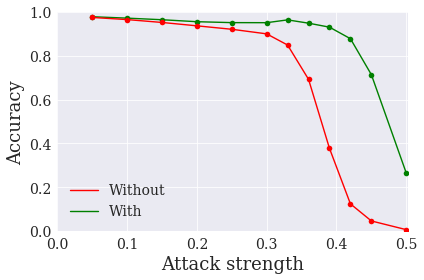

In [3]:
## MNIST
mnist_pgd_pgd_diff_eps_nml_df, mnist_pgd_pgd_diff_eps_erm_df = analyze_utilities.create_nml_vs_eps_df(\
                                                                  mnist_pgd_pgd_diff_eps, eps_type="attack")
axes = plt.gca()
axes.set_xlim([0.0, 0.502])
axes.set_ylim([-0.0, 1.0])
l1 = plt.plot(mnist_pgd_pgd_diff_eps_nml_df['eps'],mnist_pgd_pgd_diff_eps_nml_df['acc'], 'go-')
l2 = plt.plot(mnist_pgd_pgd_diff_eps_erm_df['eps'],mnist_pgd_pgd_diff_eps_erm_df['acc'], 'ro-')
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')

green_line = mlines.Line2D([], [], color='green', markersize=15, label='With')
red_line = mlines.Line2D([], [], color='red', markersize=15, label='Without')
plt.legend(handles=[red_line, green_line], fontsize=14, ncol=1, loc=3)
plt.savefig(os.path.join(output_path, 'fig_mnist_acc_vs_attack_strength.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()


Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232243\\results_cifar_adversarial_20190901_232243.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232245\\results_cifar_adversarial_20190901_232245.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232247\\results_cifar_adversarial_20190901_232247.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232249\\results_cifar_adversarial_20190901_232249.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232251\\results_cifar_adversarial_20190901_232251.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232253\\results_cifar_adversarial_20190901_232253.json']
Loading:['./../results/paper/CIFAR/figure_1_b\\cifar_adversarial_results_20190901_232255\\results_cifar_adversarial_20190901_232255.json']
Loading:['./../results/pape

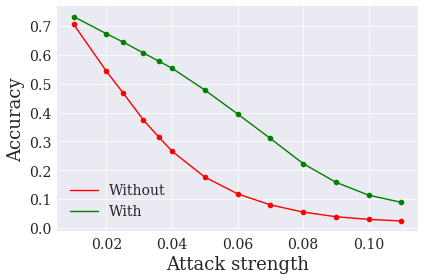

In [10]:
## CIFAR
cifar_pgd_pgd_diff_eps_nml_df, cifar_pgd_pgd_diff_eps_erm_df = analyze_utilities.create_nml_vs_eps_df(\
                                                                  cifar_pgd_pgd_diff_eps_final, eps_type="attack")
plt.figure()
l1 = plt.plot(cifar_pgd_pgd_diff_eps_nml_df['eps'],cifar_pgd_pgd_diff_eps_nml_df['acc'], 'go-')
l2 = plt.plot(cifar_pgd_pgd_diff_eps_erm_df['eps'],cifar_pgd_pgd_diff_eps_erm_df['acc'], 'ro-')
plt.legend(handles=[red_line, green_line], fontsize=14, ncol=1, loc=3)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'figure_cifar_acc_vs_attack_strength.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()

Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.05\\results_mnist_adversarial_20191012_130956.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.1\\results_mnist_adversarial_20191012_130958.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.15\\results_mnist_adversarial_20191012_131001.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.2\\results_mnist_adversarial_20191012_131003.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.25\\results_mnist_adversarial_20191012_131005.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.3\\results_mnist_adversarial_20191012_131007.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.33\\results_mnist_adversarial_20191012_131009.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\mnist_bpda_eps0.36\\results_mnist_adversarial_20191012_131011.json']
Loading:['./../results/MNIST/mnist_bpda_diff_eps\\m

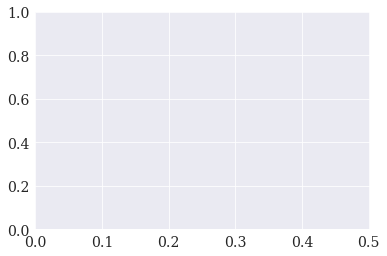

In [3]:
## ADAPTIVE ATTACK - Doesn't appear on paper

# MNIST - Different attack strengths for PGD and BPDA attack ("epsilon": 0.05-0.5,"pgd_iter": 50,"pgd_step": 0.01, "pgd_test_restart_num": 20) refinement=0.1
# basic model is trained with PGD
# mnist_{attack_type}_diff_eps
# mnist_pgd_diff_eps2 = './../results/MNIST/mnist_adv_model_diff_eps_pgd'
mnist_pgd_diff_eps = './../results/paper/MNIST/figure_1_a'

# "pgd_iter": 50:
# mnist_bpda_diff_eps = './../results/MNIST/mnist_adv_model_diff_eps_adaptive' # 200 samples,  refinement 0.1
mnist_bpda_diff_eps = './../results/MNIST/mnist_bpda_diff_eps' # 3000 samples,  refinement 0.1
mnist_bpda_diff_eps2 = './../results/MNIST/mnist_bpda_diff_eps_model_02' # 3000 samples,  refinement 0.1 with model trained with eps=0.2
mnist_bpda_diff_eps3 = './../results/MNIST/mnist_bpda_diff_eps_model_04' # 3000 samples,  refinement 0.1 with model trained with eps=0.4

mnist_bpda_diff_eps_nml_df, mnist_bpda_diff_eps_erm_df = analyze_utilities.create_nml_vs_eps_df(mnist_bpda_diff_eps, eps_type="attack")
mnist_bpda_diff_eps_nml_df2, mnist_bpda_diff_eps_erm_df2 = analyze_utilities.create_nml_vs_eps_df(mnist_bpda_diff_eps2, eps_type="attack")
# 40 iterations only:
mnist_bpda_diff_eps_nml_df3, mnist_bpda_diff_eps_erm_df3 = analyze_utilities.create_nml_vs_eps_df(mnist_bpda_diff_eps3, eps_type="attack")

mnist_pgd_pgd_diff_eps_nml_df, mnist_pgd_pgd_diff_eps_erm_df = analyze_utilities.create_nml_vs_eps_df(\
                                                                  mnist_pgd_diff_eps, eps_type="attack", idx=range(0,2999))

print(mnist_bpda_diff_eps_nml_df)


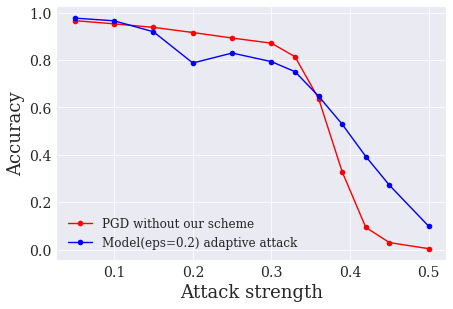

           acc mean loss  std loss mean entropy   eps refine_iter  \
0     0.966322  0.101304  0.433348    0.0538341  0.05         NaN   
1     0.952984  0.136747  0.522807    0.0648824   0.1         NaN   
2     0.937979  0.182494  0.625973    0.0769933  0.15         NaN   
3     0.916305  0.239251  0.740206    0.0894274   0.2         NaN   
4     0.892964  0.305057   0.86246       0.1025  0.25         NaN   
5      0.87129  0.386213  0.995238     0.116964   0.3         NaN   
6     0.813938  0.552526    1.1535     0.163218  0.33         NaN   
7     0.637212   1.04483   1.49407     0.248435  0.36         NaN   
8     0.328109   1.98274   1.83046     0.301983  0.39         NaN   
9    0.0936979   3.37659   2.05329     0.268204  0.42         NaN   
10   0.0296766    4.8812   2.16564     0.210266  0.45         NaN   
11  0.00400133   7.14831   2.35736      0.14936   0.5         NaN   

   refine_random_start refine_restart_num beta  \
0                  NaN                NaN  NaN   
1 

In [79]:
# l1 = plt.plot(mnist_bpda_diff_eps_nml_df['eps'],mnist_bpda_diff_eps_nml_df['acc'], 'yo-', label='BPDA attack on our scheme')
# l2 = plt.plot(mnist_bpda_diff_eps_erm_df['eps'],mnist_bpda_diff_eps_erm_df['acc'], 'ro-', label='BPDA attack without our scheme')

l3 = plt.plot(mnist_pgd_pgd_diff_eps_erm_df['eps'],mnist_pgd_pgd_diff_eps_erm_df['acc'], 'ro-', label='PGD without our scheme')
# l4 = plt.plot(mnist_pgd_pgd_diff_eps_nml_df['eps'],mnist_pgd_pgd_diff_eps_nml_df['acc'], 'go-', label='PGD with our scheme')

l5 = plt.plot(mnist_bpda_diff_eps_nml_df2['eps'],mnist_bpda_diff_eps_nml_df2['acc'], 'bo-', label="Model(eps=0.2) adaptive attack")
# l6 = plt.plot(mnist_bpda_diff_eps_nml_df3['eps'],mnist_bpda_diff_eps_nml_df3['acc'], 'co-', label="Model(eps=0.4) adaptive attack")

plt.legend(fontsize=12, ncol=1, loc=3)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
is_save_fig = True
plt.savefig(os.path.join(output_path, 'mnist_acc_vs_attack_strength_PGD_BPDA_model0.2.jpeg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
# plt.figure()
# axes = plt.gca()
# axes.set_xlim([0.0, 0.502])
# axes.set_ylim([-0.0, 1.0])
plt.show()
print(mnist_pgd_pgd_diff_eps_erm_df)
print(mnist_bpda_diff_eps_nml_df3)

### Accuracy of a model trained with BPDA examples
The original model (PGD, eps=0.3) was retrained for 6 epoches with BPDA examples.
As before, the model is tested on 50 iterations of PGD (on the base retrained model) and 50 iterations of BPDA for different epsilon strength.

Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185358\\results_mnist_adversarial_20191126_185358.json']
Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185400\\results_mnist_adversarial_20191126_185400.json']
Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185402\\results_mnist_adversarial_20191126_185402.json']
Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185404\\results_mnist_adversarial_20191126_185404.json']
Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185406\\results_mnist_adversarial_20191126_185406.json']
Loading:['./../results/MNIST/mnist_bpda_model_diff_eps_pgd_50iter\\mnist_adversarial_results_20191126_185408\\results_mnist_adversarial_20191126_185408.json']
Loading:['./../results/MNIST/mnist_bpda_model_

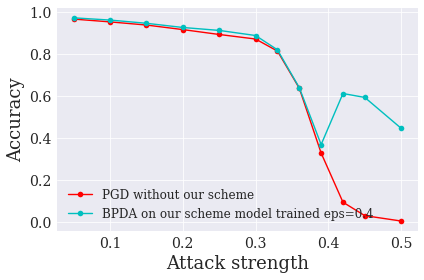

In [4]:
mnist_bpda_model_diff_eps_pgd_nml_df, mnist_bpda_model_diff_eps_pgd_erm_df = analyze_utilities.create_nml_vs_eps_df(mnist_bpda_model_diff_eps_pgd_50iter, eps_type="attack") 
mnist_bpda_model_diff_eps_nml_df, _ = analyze_utilities.create_nml_vs_eps_df(mnist_bpda_model_diff_eps_bpda_50iter, eps_type="attack", flag_read_json=False)

# plt.plot(mnist_bpda_model_diff_eps_nml_df['eps'],mnist_bpda_model_diff_eps_nml_df['acc'], 'bo-', label='BPDA on our scheme')
plt.plot(mnist_pgd_pgd_diff_eps_erm_df['eps'],mnist_pgd_pgd_diff_eps_erm_df['acc'], 'ro-', label='PGD without our scheme')
plt.plot(mnist_bpda_diff_eps_nml_df3['eps'],mnist_bpda_diff_eps_nml_df3['acc'], 'co-', label='BPDA on our scheme model trained eps=0.4')
# plt.plot(mnist_bpda_model_diff_eps_pgd_nml_df['eps'],mnist_bpda_model_diff_eps_pgd_nml_df['acc'], 'yo-', label='PGD on our scheme')

plt.legend(fontsize=12, ncol=1, loc=3)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
is_save_fig = True
plt.savefig(os.path.join(output_path, 'figure_mnsit_acc_vs_attack_strength_PGD_BPDA_model_trained_eps0.4.jpeg'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
axes = plt.gca()
# axes.set_xlim([0.0, 0.392])
plt.show()




In [71]:
print("print accuracy difference:\n")

merged_df = pd.merge(mnist_pgd_pgd_diff_eps_erm_df.loc[:,['eps','acc']], 
                 mnist_bpda_model_diff_eps_nml_df.loc[:,['eps','acc']].rename(columns={'acc': 'bpda_model'}), on='eps')
merged_df = pd.merge(merged_df, mnist_bpda_diff_eps_nml_df3.loc[:,['eps','acc']].rename(columns={'acc': '0.4_model'}), on='eps')
print(merged_df)

print accuracy difference:

     eps         acc bpda_model 0.4_model
0   0.05    0.966322      0.949  0.972333
1   0.15    0.937979   0.939667  0.946333
2    0.2    0.916305      0.923  0.926333
3   0.25    0.892964      0.907  0.912333
4    0.3     0.87129      0.888     0.888
5   0.33    0.813938   0.808667      0.82
6   0.36    0.637212   0.650333  0.639667
7   0.39    0.328109   0.334667  0.368333
8   0.42   0.0936979      0.677  0.611667
9   0.45   0.0296766      0.671     0.593
10   0.5  0.00400133   0.526667  0.445667


### Accuracy of a model trained with BPDA examples - 300 iterations attack

The original model (PGD, eps=0.3) was retrained for 6 epoches with BPDA examples. Unlike before, the model is tested on 300 iterations of PGD (on the base retrained model) and 50 iterations of BPDA for different epsilon strength.

print accuracy difference:

     eps         acc bpda_model
0   0.05    0.966333      0.958
1    0.1       0.953   0.949333
2   0.15       0.938      0.938
3    0.2    0.916333   0.923333
4   0.25    0.890667      0.903
5    0.3       0.864      0.876
6   0.33       0.799      0.757
7   0.36       0.564      0.382
8   0.39    0.176333   0.079333
9   0.42   0.0396667      0.227
10  0.45  0.00766667   0.204667
11   0.5           0      0.065


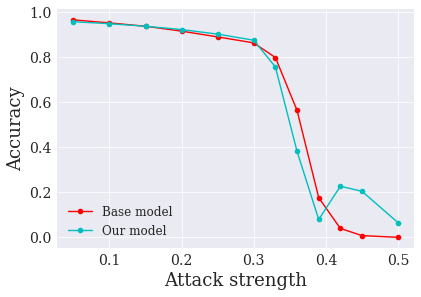

In [16]:
# mnist_pgd_pgd_diff_eps_nml_df, mnist_pgd_pgd_diff_eps_erm_df = analyze_utilities.create_nml_vs_eps_df(\
#                                                                   mnist_diff_eps_pgd_300iter, eps_type="attack")

# mnist_bpda_model_diff_eps_pgd_nml_df, _ = analyze_utilities.create_nml_vs_eps_df(\
#                                                     mnist_bpda_model_diff_eps_pgd_300iter, eps_type="attack", flag_read_json=False) 
plt.plot(mnist_pgd_pgd_diff_eps_erm_df['eps'],mnist_pgd_pgd_diff_eps_erm_df['acc'], 'ro-', label='PGD without our scheme')
plt.plot(mnist_bpda_model_diff_eps_pgd_nml_df['eps'],mnist_bpda_model_diff_eps_pgd_nml_df['acc'], 'co-', label='BPDA on our scheme')

plt.legend(fontsize=12, ncol=1, loc=3)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')

print("print accuracy difference:\n")

merged_df = pd.merge(mnist_pgd_pgd_diff_eps_erm_df.loc[:,['eps','acc']], 
                 mnist_bpda_model_diff_eps_pgd_nml_df.loc[:,['eps','acc']].rename(columns={'acc': 'bpda_model'}), on='eps')
print(merged_df)